<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Aplicación de la derivada</h1>

<h4 align="center">Ecuaciones de una variable y Optimización</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en conceptos
matemáticos para aplicar la derivada numérica en la resolución
de ecuaciones de una variable y optimización.</div>

# Aplicaciones de la derivada


En clases anteriores, abordamos el problema de encontrar dónde una función se anula. En este Notebook veremos que las derivadas también nos pueden ayudar en este desafío, además de poder aplicarse en otros problemas, como la aproximación de una función mediante polinomios y la optimización de una función.

## 4. Ecuaciones de una variable (continuación)

### 4.1 Método de la Secante

<img  src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Secant_method.svg/450px-Secant_method.svg.png" alt="Método de la secante" width=280 align="center" hspace=0 vspace=5 padding:5px />

De la clase anterior, sabemos que una función $f$ puede ser cortada en dos de sus puntos mediante una recta llamada *secante* Esta recta tiene una ecuación bien definida, esta vez dada por los puntos $(x_0,f(x_0))$, $(x_1,f(x_1))$ y la fórmula

$$y\ =\ \frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_1)+f(x_1)$$
    
Para encontrar un valor $x$ en que $f(x)=0$, se puede aproximar el resultado esperado utilizando $y=0$ en la fórmula anterior. Esto da lugar a una solución parcial
    
$$x = x_1-f(x_1)\frac{x_1-x_0}{f(x_1)-f(x_0)}$$
    
Esto se puede extender de forma iterativa, generando una sucesión de valores $x_n$ que se aproximan a la solución real:

$$x_n = x_{n-1}-f(x_{n-1})\frac{x_{n-1}-x_{n-2}}{f(x_{n-1})-f(x_{n-2})}$$

Esto depende de la elección de dos puntos de inicio, $x_0$ y $x_1$, además de algunas propiedades que debe satisfacer $f$, que mencionaremos dentro de poco. Este método se conoce como **Método de la Secante**.

### 4.2 Método de Newton-Raphson

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/NewtonIteration_Ani.gif/450px-NewtonIteration_Ani.gif" width=450 alt="Método de Newton-Raphson" align="center"/> 

Del mismo modo, si la diferencia entre $x_{n-1}$ y $x_{n-2}$ es "pequeña", se puede aproximar la sucesión anterior a la fórmula

$$x_n = x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$$

donde ahora la recurrencia sólo depende de un paso anterior, por lo cual se requiere un solo punto $x_0$ de inicio. Además, este último método converge más rápido que el Método de la Secante, y se conoce como **Método de Newton-Raphson**.

### 4.3 Hipótesis necesarias

Es necesario notar que ambos métodos tienen sus limitaciones, siendo las más importante que haya **sólo un cero** (para el Método de la Secante), que $f'(x)\neq0$ (para el Método de Newton-Raphson) y que la función sea continuamente dos veces derivable. 

Este último punto nos obliga a definir qué es ser "continuamente dos veces derivable". Sin embargo, la forma más inmediata de abordar esto, es simplemente decir que el método utilizado para calcular la derivada de $f$ lo usamos ahora para calcular la derivada de $f'$, y que el resultado es continuo, en el sentido que vimos en clases anteriores. Lo que se consigue es llamado **segunda derivada** de $f$, y se denota $\frac{d^2f}{dx^2}(x)$ o $f''(x)$.

## 5. Optimización

El objetivo de esta rama de las Matemáticas es encontrar dónde las funciones alcanzan su valor máximo o mínimo, qué condiciones deben cumplirse para que éstos existan y de qué forma se puede aproximar dichos valores. En esta sección, veremos ideas básicas de optimización en funciones reales diferenciables con derivada continua, en problemas irrestrictos.

Recordemos que la derivada de una función $f$ representa en un punto $x$ cuánto vale la pendiente de la recta tangente a su curva, en ese punto. Por lo tanto, cuando $f'(x)>0$, se dice que la función crece entorno a ese punto, y decrece cuando $f'(x)<0$. Como vimos en el ejercicio de encontrar ceros en una función continua, el hecho de que haya un cambio de signo en la función $f'$ implica que debe existir un valor $\bar{x}$ en que $f(\bar{x})=0$. Un punto $\bar{x}$ con esta característica se llama **punto estacionario**, ya que ahí la función no crece ni decrece. Esto indica que, si encontramos dicho valor $\bar{x}$, éste será un *candidato* a máximo o mínimo (¡existen los *puntos silla*!).

Ya conocemos formas de encontrar ceros de una función. Podemos aplicarlo en nuestra función $f'$ para encontrar, aproximadamente, dónde ésta se anula y así tener lo candidatos a óptimo. Para conocer mejor la naturaleza de el candidato $\bar{x}$, será necesario calcular $f''(\bar{x})$. Si se obtiene que $f''(\bar{x})>0$, sin duda $\bar{x}$ será **mínimo**, mientras que si $f''(\bar{x})<0$, $\bar{x}$ será **máximo**. El caso $f''(\bar{x})=0$ es más problemático, aunque matemáticamente es abordable y visualmente lo es aún más.


In [1]:
# Importando las librerías
%matplotlib notebook
import numpy as np
import matplotlib.colors as mcolors # Nos permite utilizar una paleta de colores más amplia
import matplotlib.pyplot as plt
import experimento5 as ex

In [2]:
def f(x): # Alguna función de ejemplo
    return 0.5 - np.sin(2 * x)

def g(x): # Alguna función de ejemplo
    return (np.exp(-x ** 2) - x) / ((x + 1) ** 2 + (x - 1) ** 2)

def h(x):
    return np.exp(x)

<IPython.core.display.Javascript object>


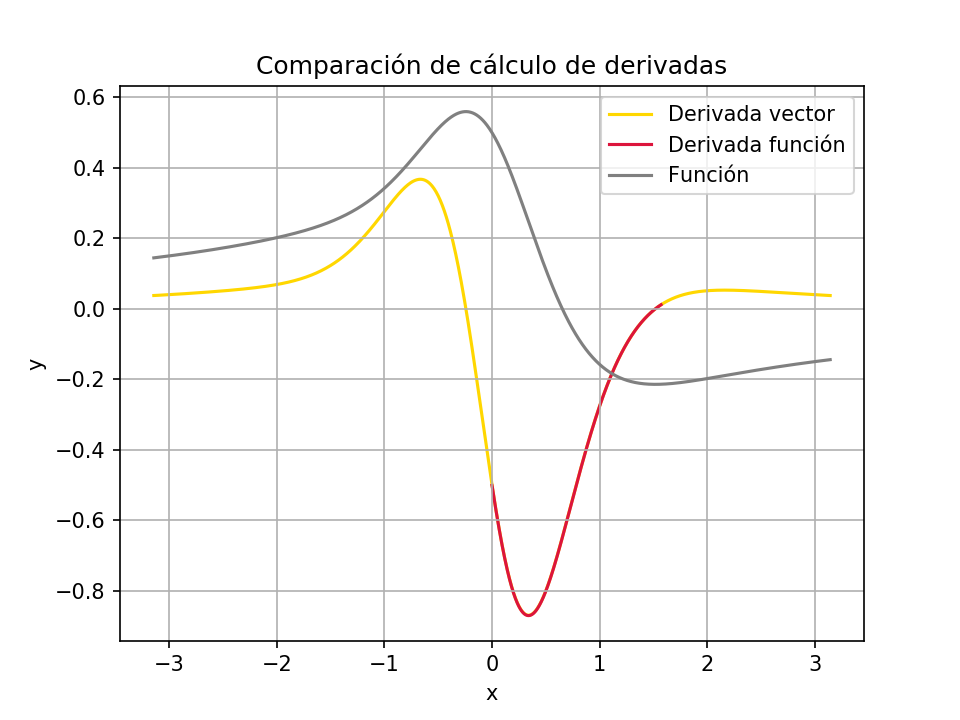

In [3]:
# Probamos nuestras funciones para calcular derivadas, con distintos tamaños de arreglo y dx

x = np.linspace(-np.pi, np.pi, 1000)
y = g(x)
dydx1 = ex.derivadavec(x, y)
dydx2 = ex.derivadafun(0, np.pi/2, g, 0.001)

x2 = np.linspace(0, np.pi/2, len(dydx2))

plt.plot(x, dydx1, color='gold', label='Derivada vector', zorder=0)
plt.plot(x2, dydx2, color='crimson', label='Derivada función', zorder=1)
plt.plot(x, y, color='gray', label='Función', zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de cálculo de derivadas')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Buscamos los ceros de g(x)

x0, y0 = ex.ceros(-3, 3, g)
print(x0)

[0.65625]


<IPython.core.display.Javascript object>


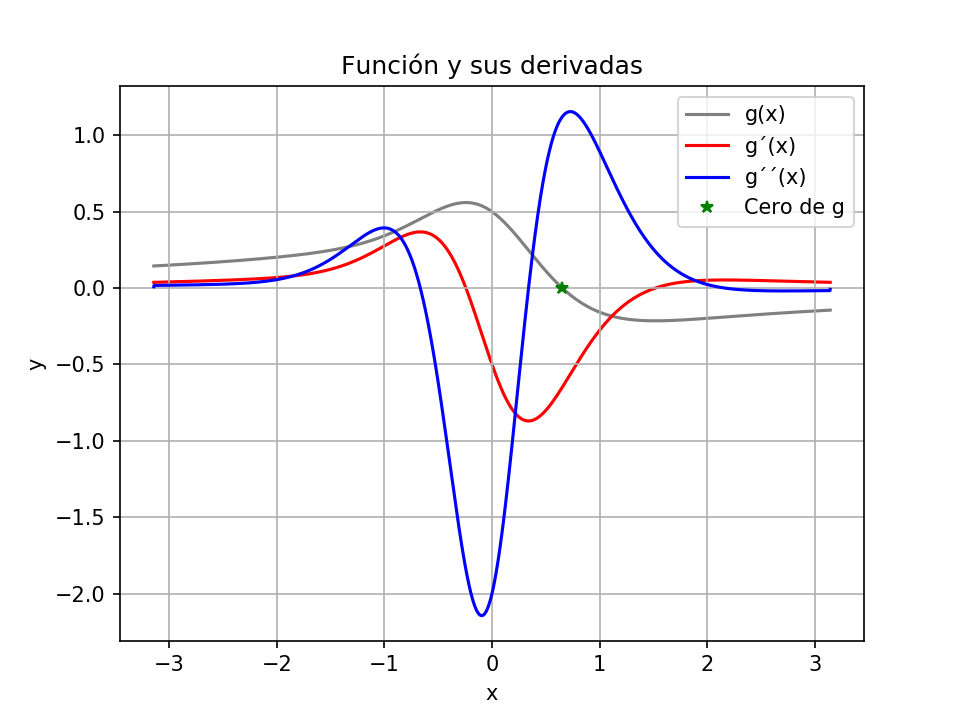

In [5]:
# Probamos nuestras funciones para calcular derivadas, con distintos tamaños de arreglo y dx

x = np.linspace(-np.pi, np.pi, 10000)
y = g(x)
dydx = ex.derivadavec(x, y)
d2ydx2 = ex.derivadavec(x, dydx)

x0, y0 = ex.ceros(-5, 5, g, x[1]-x[0])

plt.plot(x, y, color='gray', label='g(x)', zorder=0)
plt.plot(x, dydx, color='red', label='g´(x)', zorder=1)
plt.plot(x, d2ydx2, color='blue', label='g´´(x)', zorder=2)
plt.plot(x0, y0, marker='*', color='green', label='Cero de g', linestyle='', zorder=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y sus derivadas')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


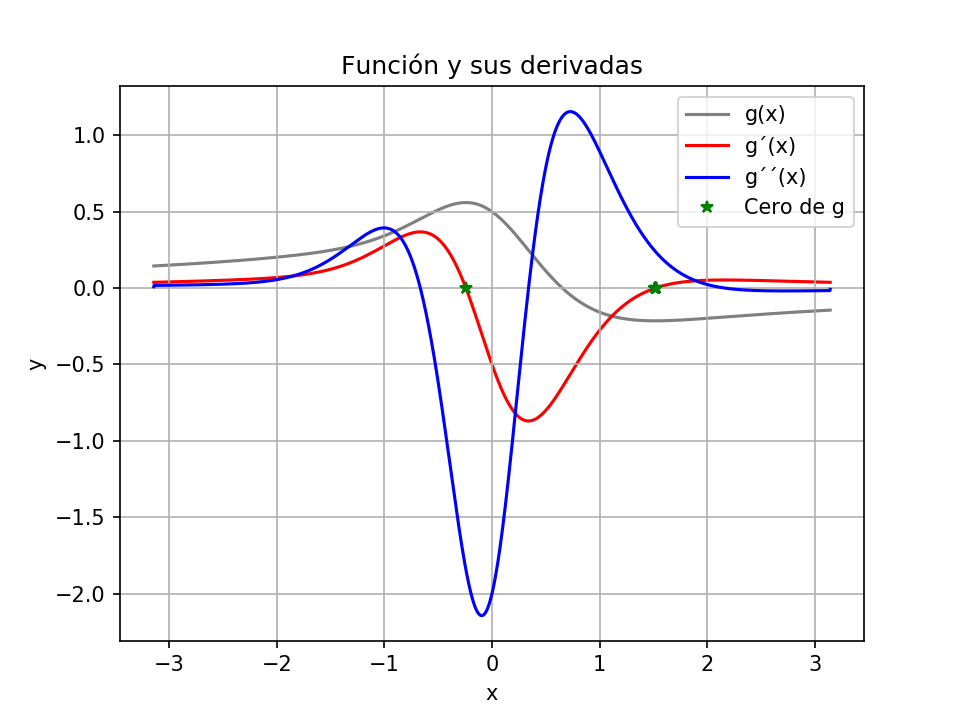

In [6]:
# Incluimos el cálculo de los x en que f(x)=0

x1, y1 = ex.cerof(x, dydx, x[1]-x[0])

# Probamos nuestras funciones para calcular derivadas, con distintos tamaños de arreglo y dx

x = np.linspace(-np.pi, np.pi, 10000)
y = g(x)
dydx = ex.derivadavec(x, y)
d2ydx2 = ex.derivadavec(x, dydx)

plt.plot(x, y, color='gray', label='g(x)', zorder=0)
plt.plot(x, dydx, color='red', label='g´(x)', zorder=1)
plt.plot(x, d2ydx2, color='blue', label='g´´(x)', zorder=2)
plt.plot(x1, y1, marker='*', color='green', label='Cero de g', linestyle='', zorder=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y sus derivadas')
plt.legend()
plt.grid()
plt.show()

¿Cómo podríamos encontrar el valor de f''(x) en los valores x que encontramos?

## Ejercicios

**1.-** Intente escribir un código para utilizar el Método de la Secante y el Método de Newton-Raphson y aplíquelo a alguna de las funciones vistas.

**2.-** 

**a)** En relación con el problema de encontrar $x\in[a,b]$ tal que $f(x)\ =\ 0$, busque (por ejemplo, en Wikipedia) información sobre el Método de Householder o *Householder's Method*. Note que el método de Newton-Raphson es uno de estos modelos, pero que hay casos en que se usa derivadas de orden superior. Intente escribir un algoritmo con alguno de esos métodos (incluso puede hacer un algoritmo que permita utilizar cualquiera de los métodos), y aplíquelo a la función

$$f(x)\ =\ \frac{e^{-x^2}-x^3}{(x+1)^2+(x-1)^2}$$

Para ello, grafique esa función en algún intervalo en que se sepa que la función se anula. Puede ayudarse con el uso de una grilla, escribiendo
```Python
plt.grid() # Para desplegar la grilla
plt.show() # Para mostrar el gráfico
```
y tome un valor inicial $x_0$ que visualmente se halle cercano a la solución.

**b)** Haga lo mismo que antes, buscando información sobre el Método de Halley (o *Halley's Method*).

**3.-** Utilice el Notebook y cualquiera de los métodos vistos o los definidos en clase para estudiar las siguientes funciones:
  <ol style="list-style-type:lower-alpha">
  <li>$\qquad f(x) = x^p,\quad p\in\mathbb{R}$. Pruebe con distintos valores de $p$ (distinga entre $p\ge0$ y $p<0$ $$\\$$</li>
    
  <li>$\qquad g(x) = \frac{x}{\sqrt{x^2+1}}$ $$\\$$</li>
    
  <li>$\qquad h(x) = \frac{\sin^2(x)}{x},\quad x\neq0$</li>
 </ol> 

 **4.-** Intente programar un algoritmo para encontrar los mínimos y máximos de una función $f$, si los tiene.